### Importing stuff and loading dataframe

In [364]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import math

plt.style.use('ggplot')
df = pd.read_csv('data\\train.csv')

df.shape

(891, 12)

### Describing the dataframe

In [365]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Blank, Mr. Henry",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [366]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualising the dataframe

### Survivors based on sex

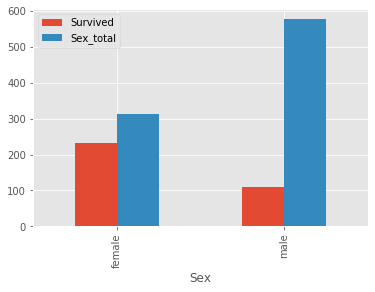

In [367]:
df_sex_survive = df[['Sex','Survived']].groupby('Sex').apply(sum)
df_sex_survive.join(df['Sex'].value_counts(),rsuffix='_total').plot(y=['Survived','Sex_total'],kind='bar')

### Survivors by age

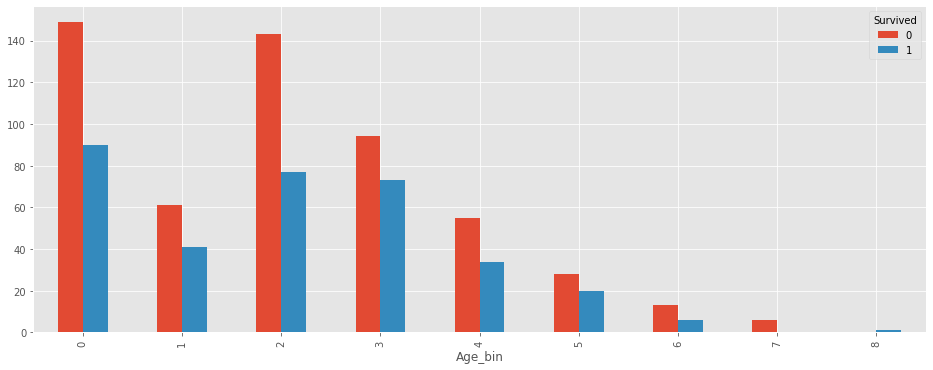

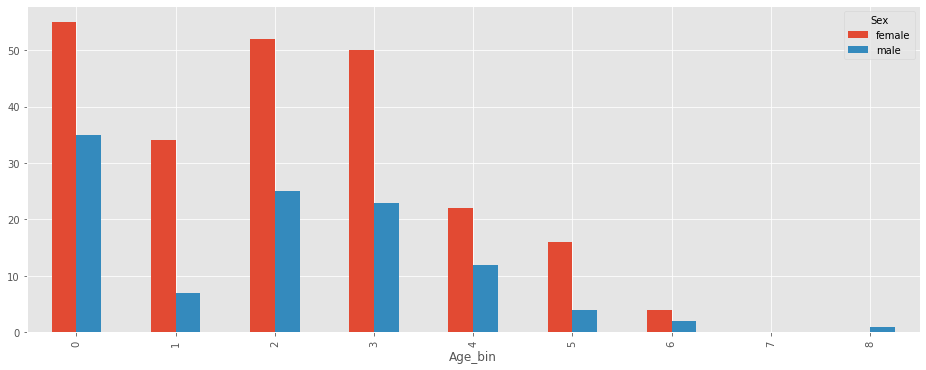

In [368]:
df2 = df.copy()
df2.fillna(0,inplace=True)
df2['Age_bin'] = (df2['Age']/10).apply(math.floor)
df2['Count'] = 1
df2[['Age_bin','Survived','Count']].pivot_table(values='Count',index='Age_bin',columns='Survived',aggfunc='sum').plot(kind='bar',figsize=(16,6))
df2[['Age_bin','Sex','Survived']].pivot_table(values='Survived',index='Age_bin',columns='Sex',aggfunc='sum').plot(kind='bar',figsize=(16,6))


### Survivors by ticket class

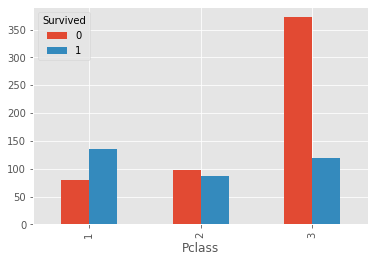

In [369]:
df[['Pclass','Survived','PassengerId']].pivot_table(values='PassengerId',index='Pclass',columns='Survived',aggfunc='count').plot(kind='bar')

### Sibling+spouse vis

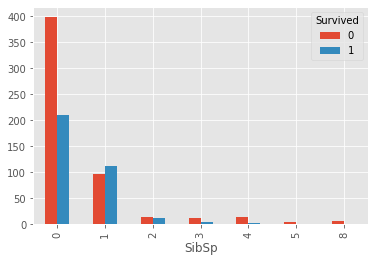

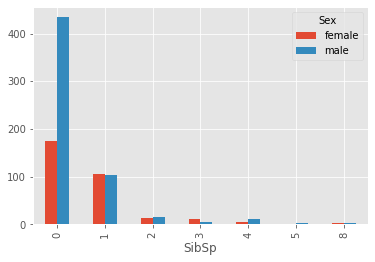

In [370]:
df[['SibSp','Survived','PassengerId']].pivot_table(values='PassengerId',index='SibSp',columns='Survived',aggfunc='count').plot(kind='bar')
df[['SibSp','Sex','Survived']].pivot_table(values='Survived',index='SibSp',columns='Sex',aggfunc='count').plot(kind='bar')

### Parent + children

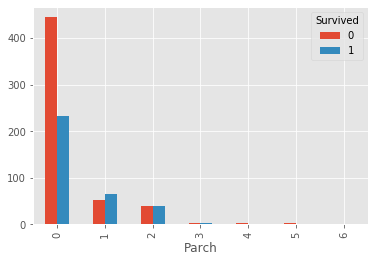

In [371]:
df[['Parch','Survived','PassengerId']].pivot_table(values='PassengerId',index='Parch',columns='Survived',aggfunc='count').plot(kind='bar')

TypeError: 'numpy.dtype' object is not callable

## Feature engineering

ModuleNotFoundError: No module named 'strings'